In [ ]:
from __future__ import absolute_import, division, print_function

In [ ]:
import numpy as np # linear algebra

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from PIL import Image

In [ ]:
import os

In [ ]:
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/Miniproject')

In [ ]:
print(os.listdir("/content/drive/MyDrive/Miniproject/malaria/cell_images"))

['Parasitized', 'Uninfected', 'input for infected', 'input for uninfected']


In [ ]:
infected = os.chdir('/content/drive/MyDrive/Miniproject/malaria/cell_images/Parasitized')

In [ ]:
uninfected = os.chdir('/content/drive/MyDrive/Miniproject/malaria/cell_images/Uninfected')#image preprocessing

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the model
model = Sequential()

In [ ]:
# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# Flatten the output
model.add(Flatten())

In [ ]:
# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Load and preprocess the training and validation data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Miniproject/malaria/cell_images',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 27637 images belonging to 4 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Miniproject/malaria/cell_images',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 27637 images belonging to 4 classes.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
    )


Epoch 1/20
50/50 [==============================] - 6457s 131s/step - loss: 0.6920 - accuracy: 0.5306 - val_loss: 0.6889 - val_accuracy: 0.5101
Epoch 2/20
50/50 [==============================] - 159s 3s/step - loss: 0.6758 - accuracy: 0.5863 - val_loss: 0.6459 - val_accuracy: 0.6416
Epoch 3/20
50/50 [==============================] - 127s 3s/step - loss: 0.6542 - accuracy: 0.6094 - val_loss: 0.6377 - val_accuracy: 0.6718
Epoch 4/20
50/50 [==============================] - 158s 3s/step - loss: 0.6378 - accuracy: 0.6694 - val_loss: 0.5870 - val_accuracy: 0.7234
Epoch 5/20
50/50 [==============================] - 158s 3s/step - loss: 0.6088 - accuracy: 0.6694 - val_loss: 0.5791 - val_accuracy: 0.7621
Epoch 6/20
50/50 [==============================] - 158s 3s/step - loss: 0.5043 - accuracy: 0.7850 - val_loss: 0.3956 - val_accuracy: 0.8255
Epoch 7/20
50/50 [==============================] - 160s 3s/step - loss: 0.3858 - accuracy: 0.8450 - val_loss: 0.2682 - val_accuracy: 0.9021
Epoch 8/20

In [ ]:
data = []
labels = []

In [ ]:
for i in infected or []:
   try:

       image = cv2.imread("/content/drive/MyDrive/Miniproject/malaria/cell_images/Parasitized"+i)
       image_array = Image.fromarray(image,'RGB')
       resize_img = image_array.resize((50 , 50))
       rotated45 = resize_img.rotate(45)
       rotated75 = resize_img.rotate(75)
       blur = cv2.blur(np.array(resize_img) ,(10,10))
       data.append(np.array(resize_img))
       data.append(np.array(rotated45))
       data.append(np.array(rotated75))
       data.append(np.array(blur))
       labels.append(1)
       labels.append(1)
       labels.append(1)
       labels.append(1)

   except AttributeError:
     print('')


In [ ]:
for u in uninfected or []:
    try:

       image = cv2.imread("/content/drive/MyDrive/Miniproject/malaria/cell_images/Uninfected"+u)
       image_array = Image.fromarray(image , 'RGB')
       resize_img = image_array.resize((50 , 50))
       rotated45 = resize_img.rotate(45)
       rotated75 = resize_img.rotate(75)
       data.append(np.array(resize_img))
       data.append(np.array(rotated45))
       data.append(np.array(rotated75))
       labels.append(0)
       labels.append(0)
       labels.append(0)

    except AttributeError:
       print('')

In [ ]:
cells = np.array(data)
labels = np.array(labels)

In [ ]:
np.save('Cells' , cells)
np.save('Labels' , labels)
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (0,) | labels : (0,)


In [ ]:
Cells=np.load("Cells.npy")
labels=np.load("Labels.npy")
if Cells.size != 0:
   plt.imshow(Cells[0], cmap="gray")
   plt.show()


In [ ]:
# Generating the Shuffle Key
s = np.arange(Cells.shape[0])
np.random.shuffle(s)

In [ ]:
# Shuffling the Cells and Labels with same key
Cells=Cells[s]
labels=labels[s]

In [ ]:
# Total number of labels
num_classes = len(np.unique(labels))


In [ ]:
# Total number of samples
len_data=len(Cells)


In [ ]:
# Splitting the Training set
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]

In [ ]:
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.

In [ ]:
x_test = x_test.astype('float32')/255


In [ ]:
train_len=len(x_train)
test_len=len(x_test)

In [ ]:
# Splitting the testing set
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)= cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# One hot encoding the both Testing and Training Labels
from keras.utils import to_categorical
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test , num_classes)


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Flatten   # to flatten the input data
from tensorflow.keras.layers import Dense     # for the hidden layer

In [ ]:
from keras.models import load_model
model.save('Cells.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model.save('Cells.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
sample_training_images, train_label = next(train_generator)

In [5]:
from random import randint
output=randint(0,1)


Random Display of Cell images


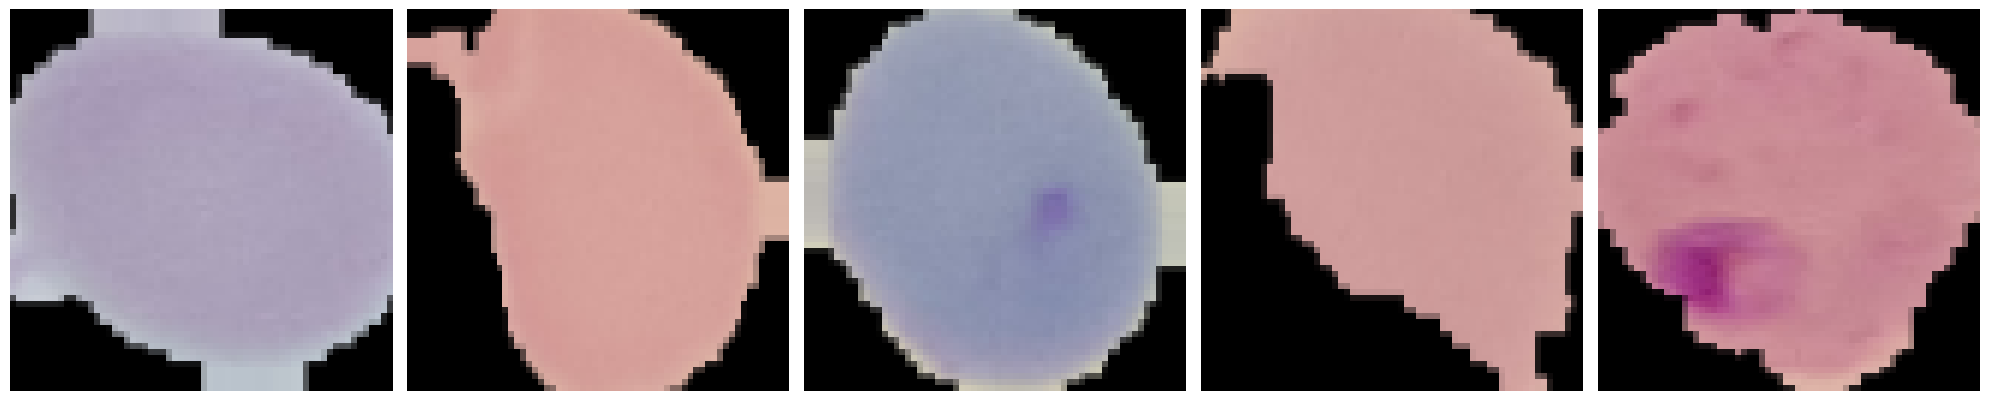

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
print('Random Display of Cell images')
plotImages(sample_training_images[:5])

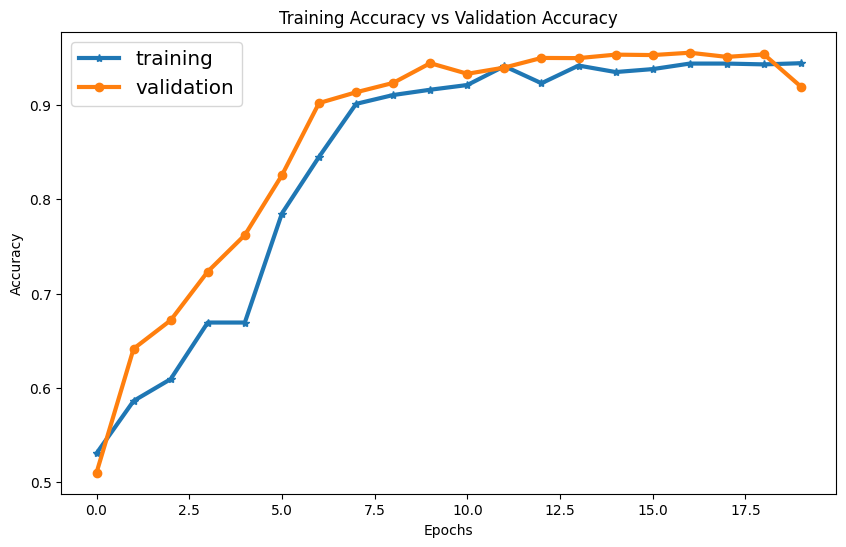

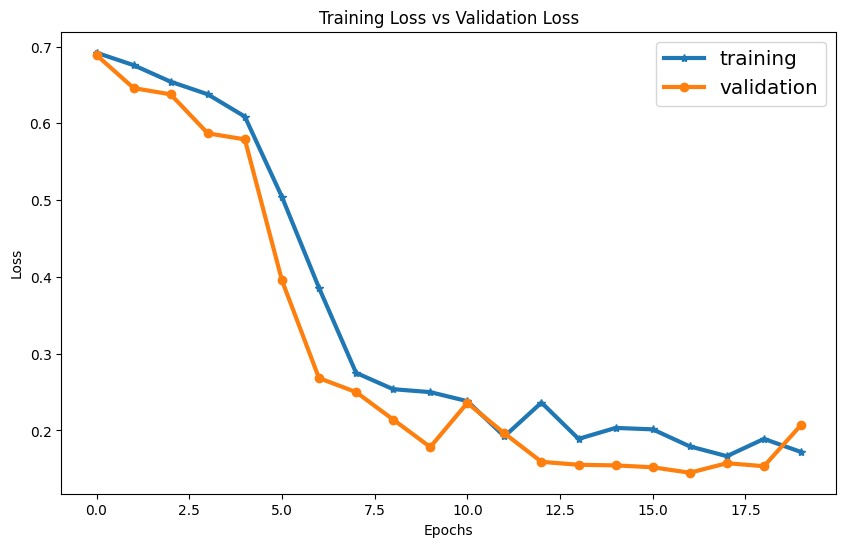

In [ ]:
#Metrics Plot
def visualize_training(history, lw = 3):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize = 'x-large')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()
visualize_training(history)

In [ ]:
import plotly.express as px
from skimage import io
img = io.imread(r'/content/drive/MyDrive/Miniproject/malaria/cell_images/input for infected/Copy of C33P1thinF_IMG_20150619_115740a_cell_161.png')
fig = px.imshow(img)
fig.show()

In [6]:
print(x_test)

1


In [ ]:
#Test_accuracy
from sklearn.metrics import accuracy_score
acc = sklearn.metrics.accuracy_score(y_train, y_test)

In [ ]:
#Evaluation metrics
from keras import backend as K
def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true.dot(y_pred), 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall
def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true.dot(y_pred), 0, 1)))
  predicted_positives= K.sum (K. round (K.clip(y_pred, 0, 1)))
  precision = true_positives (predicted_positives+ K.epsilon())
  return precision
def f1_m(y_true, y_pred):
  precision_precision_m(y_true, y_pred)
  recall=recall_m(y_true, y_pred)
  return 2*((precision.dot(recall))/(precision+recall+K.epsilon()))

In [1]:
print("Test_accuracy:",acc)
val1=precision_m(y_train,y_test)
print("precision:",val1)
val2=recall_m(y_train,y_test)
print("Recall:",val2)
val3=f1_m(y_train,y_test)
print("F1 score:",val3)

Test_accuracy:0.931429
precision:0.963636
Recall:0.981481
F1 score:0.972477
